**Loan Prediction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.fillna(method='bfill',inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:title={'center':'Gender'}>

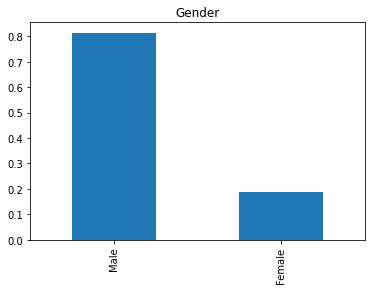

In [ ]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

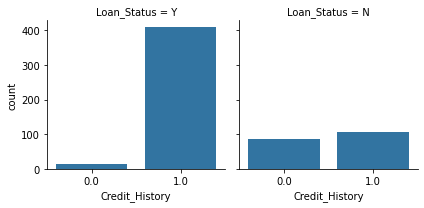

In [ ]:
grid=sns.FacetGrid(df,col='Loan_Status')
grid.map(sns.countplot,'Credit_History')

<AxesSubplot:xlabel='Gender', ylabel='count'>

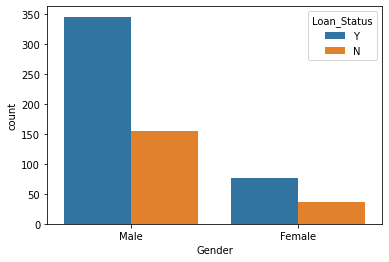

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [ ]:
df.Gender=df.Gender.map({'Male':0,'Female':1})
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
obj=(df.dtypes== 'object')
print(list(obj[obj].index))
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=10)

**RandomforestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=4,random_state=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8108108108108109

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4,random_state=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8054054054054054